# Chapter 2 - Viscous Fluids

Code used to generate figures and examples from Chapter 2 of [*Introduction to Fluid Dynamics*, by Joseph D. MacMillan](https://josephmacmillan.github.io/IntroductionToFluidDynamics/).  This work is licensed under a [Creative Commons Attribution-ShareAlike 4.0
International License.](https://creativecommons.org/licenses/by-sa/4.0/)

In [2]:
%matplotlib inline

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

rc('text.latex',preamble='\\usepackage{libertine}\n\\usepackage[libertine]{newtxmath}')
rc('font',**{'family':'serif','serif':['Linux Libertine O']}, size=18)
rc('text', usetex=True)

## Figure 2.2: Poiseuille flow slowing down over time

The fluid velocity is given by
$$
u(y, t) = \frac{4Ph^2}{\pi^3 \nu \rho} \sum_{n=1, 3, 5 \dots}^\infty \frac{1}{n^3} \sin(n \pi y / h) \, e^{-n^2 \pi^2 \nu t / h^2},
$$
plotted for three times ($t = 0$, $t = 0.5$, and $t=1.5$).  I've set the physical constants to one.

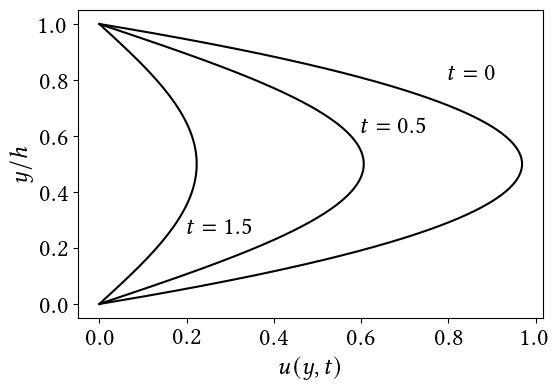

In [3]:
P = 1.0
nu = 1.0
rho = 1.0
h = 1.0
n_max = 30

y = np.linspace(0, h, 1000)
u0 = np.zeros(1000)
u1 = np.zeros(1000)
u2 = np.zeros(1000)
t0 = 0.0
t1 = 0.5
t2 = 1.5
for n in range(1, n_max, 2):
    u0 += 1 / n**3 * np.sin(n * np.pi * y / h) * np.exp(-n**2 * t0)
    u1 += 1 / n**3 * np.sin(n * np.pi * y / h) * np.exp(-n**2 * t1)
    u2 += 1 / n**3 * np.sin(n * np.pi * y / h) * np.exp(-n**2 * t2)
    
#u_init = 0.5 * (y - y**2)

fig = plt.figure(figsize=(6, 4))
plt.plot(u0, y, color="black")
plt.plot(u1, y, color="black")
plt.plot(u2, y, color="black")
plt.xlabel("$u(y, t)$")
plt.ylabel("$y/h$")
plt.text(0.8, 0.8, "$t=0$")
plt.text(0.6, 0.61, "$t=0.5$")
plt.text(0.2, 0.25, "$t=1.5$")
plt.savefig("fig_poise_time.pdf", bbox_inches='tight')

## Figure 2.3: An impulsively moved boudary

The fluid velocity in this case is 
$$
u(y, t) = U \left[ 1 - \frac{y}{h} - \frac{2}{\pi} \sum_{n=1}^\infty \frac{1}{n} \sin(n \pi y / h) \, e^{-n^2 \pi^2 \nu t / h^2} \right].
$$

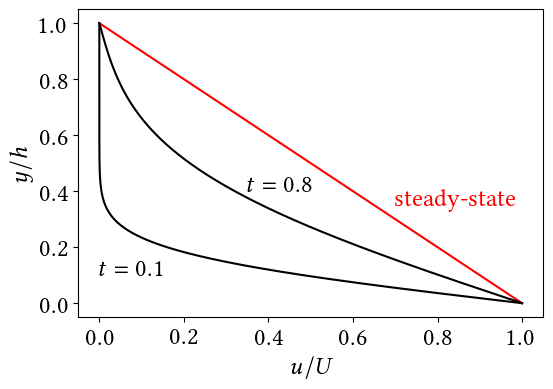

In [4]:
U = 1.0
nu = 1.0
h = 1.0
n_max = 10

y = np.linspace(0, h, 1000)
u1 = np.zeros(1000)
u2 = np.zeros(1000)
t1 = 0.1
t2 = 0.8
for n in range(1, n_max, 1):
    u1 += 2.0 / np.pi / n * np.sin(n * np.pi * y / h) * np.exp(-n**2 * t1)
    u2 += 2.0 / np.pi / n * np.sin(n * np.pi * y / h) * np.exp(-n**2 * t2)
u1 = U * (1 - y/h - u1)
u2 = U * (1 - y/h - u2)
    
u_ss = U * (1.0 - y/h)

fig = plt.figure(figsize=(6, 4))
plt.plot(u_ss, y, color="red")
plt.plot(u1, y, color="black")
plt.plot(u2, y, color="black")
plt.xlabel("$u/U$")
plt.ylabel("$y/h$")
plt.text(0.0, 0.1, "$t=0.1$")
plt.text(0.35, 0.4, "$t=0.8$")
plt.text(0.7, 0.35, "steady-state", color="red")
plt.savefig("fig_poise_imp.pdf", bbox_inches='tight')

## Figure 2.7: Self similar flow

The fluid velocity is 
$$
u(y, t) = f(\eta) = U\left[ 1 - \frac{1}{\sqrt{\pi}} \int_0^\eta e^{-\tfrac{1}{4} \eta'^2} d\eta' \right],
$$
where 
$$
\eta = \frac{y}{\sqrt{\nu t}},
$$
and I've plotted the velocity at two different times -- and with two different scales, to show off the self-similar nature of the solution.

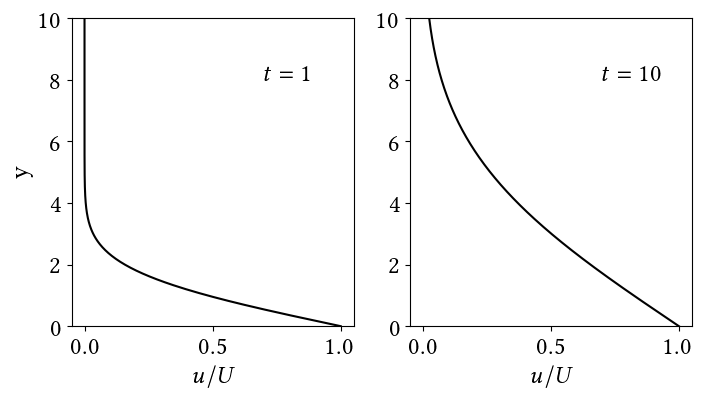

In [5]:
from scipy import integrate

U = 1.0
nu = 1.0

y = np.linspace(0, 10.0*np.sqrt(nu * 10), 1000)
u1 = np.zeros(1000)
u2 = np.zeros(1000)
t1 = 1.0
t2 = 10.0

for i in range(len(y)):
    eta1 = y[i] / np.sqrt(nu * t1)
    eta2 = y[i] / np.sqrt(nu * t2)
    u1[i] = U * ( 1.0 - 1.0 / np.sqrt(np.pi) * integrate.quad(lambda x: np.exp(-0.25 * x**2), 0, eta1)[0] )
    u2[i] = U * ( 1.0 - 1.0 / np.sqrt(np.pi) * integrate.quad(lambda x: np.exp(-0.25 * x**2), 0, eta2)[0] )


fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,2,1)
ax.plot(u1, y, color="black")
ax.set_ylim(0, 10)

ax.text(0.7, 8, "$t=1$")
ax.set_xlabel("$u/U$")
ax.set_ylabel("y")

ax = fig.add_subplot(1,2,2)
ax.plot(u2, y, color="black")

ax.set_ylim(0, 10)
ax.text(0.7, 8, "$t=10$")
ax.set_xlabel("$u/U$")

plt.savefig("fig_ss_vel1.pdf", bbox_inches='tight')

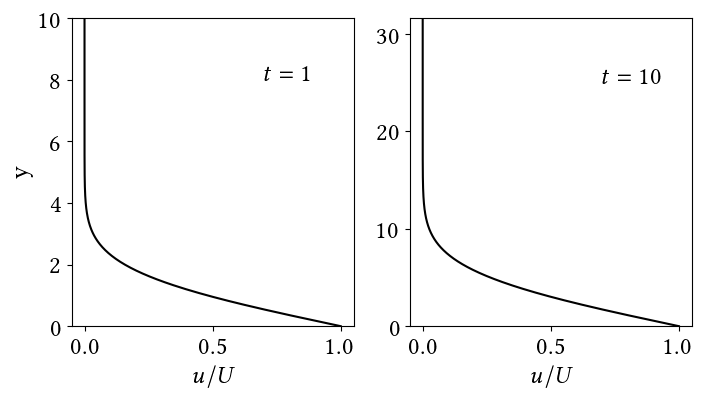

In [6]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1,2,1)
ax.plot(u1, y, color="black")
ax.set_ylim(0, 10)

ax.text(0.7, 8, "$t=1$")
ax.set_xlabel("$u/U$")
ax.set_ylabel("y")

ax = fig.add_subplot(1,2,2)
ax.plot(u2, y, color="black")

ax.set_ylim(0, 10*np.sqrt(10))
ax.text(0.7, 25, "$t=10$")
ax.set_xlabel("$u/U$")

plt.savefig("fig_ss_vel2.pdf", bbox_inches='tight')

## Figure 2.10: Bessel functions

Here I plot the Bessel functions of the first and second kinds, along with printing the zeros of each.

J_1 zeros:  [ 3.83170597  7.01558667 10.17346814 13.32369194 16.47063005]
Y_1 zeros:  [ 2.19714133  5.42968104  8.59600587 11.74915483 14.89744213]


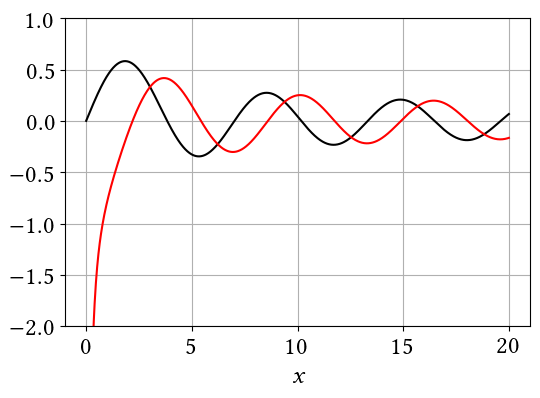

In [7]:
from scipy.special import j1, y1, jn_zeros, yn_zeros

x = np.linspace(0, 20, 1000)
J = j1(x)
Y = y1(x)

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
ax.grid(True)

ax.plot(x, J, color="black")
ax.plot(x, Y, color="red")
ax.set_ylim(-2, 1)
ax.set_xlabel("$x$")

plt.savefig("fig_bessel.pdf", bbox_inches='tight')

print("J_1 zeros: ", jn_zeros(1, 5))
print("Y_1 zeros: ", yn_zeros(1, 5))

## Figure 2.11: Spin down

The fluid velocity is
$$
u_\phi(s, t) = 2\Omega a \sum_{n=1}^\infty \frac{J_1(\lambda_n s/a)}{\lambda_n J_2(\lambda_n)} \, e^{-\lambda_n^2 \nu t / a^2}.
$$
It's plotted at three different times.

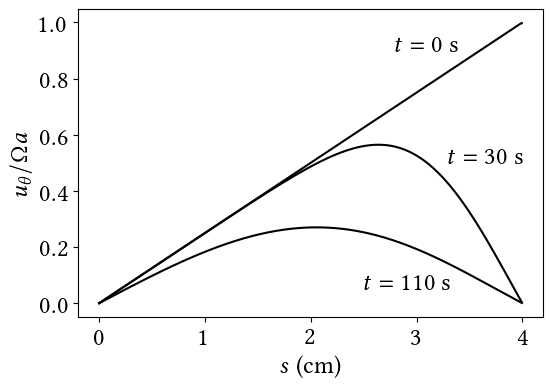

In [8]:
from scipy.special import jv

Omega = 1.0
a = 4.0
nu = 0.01
n_zeros = 100000

r = np.linspace(0, 0.999*a, 1000)
z = jn_zeros(1, n_zeros)

t1= 0
u1= 0
t2 = 30
t3 = 110
u2 = 0
u3 = 0
for n in range(0,n_zeros):
    u1 += 2.0 * j1(z[n] * r / a) / z[n] / jv(2, z[n]) * np.exp(- z[n]**2 * nu * t1 / a**2)
    u2 += 2.0 * j1(z[n] * r / a) / z[n] / jv(2, z[n]) * np.exp(- z[n]**2 * nu * t2 / a**2)
    u3 += 2.0 * j1(z[n] * r / a) / z[n] / jv(2, z[n]) * np.exp(- z[n]**2 * nu * t3 / a**2)
    
    
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)

ax.plot(r, u1, color="black")
ax.plot(r, u2, color="black")
ax.plot(r, u3, color="black")

ax.text(2.8, 0.9, "$t=0$ s")
ax.text(3.3, 0.5, "$t=30$ s")
ax.text(2.5, 0.05, "$t=110$ s")
ax.set_xlabel("$s$ (cm)")
ax.set_ylabel(r"$u_{\theta} / \Omega a$")

plt.savefig("fig_spin_vel.pdf", bbox_inches='tight')
    

## Figure 2.13: Decay of a line vortex

The fluid velocity is
$$
u_\phi(s, t) = \frac{\Gamma_0}{2\pi s} \left( 1- e^{-s^2 / 4 \nu t} \right).
$$
I've also plotted the small- and large- radii behaviour of the fluid.

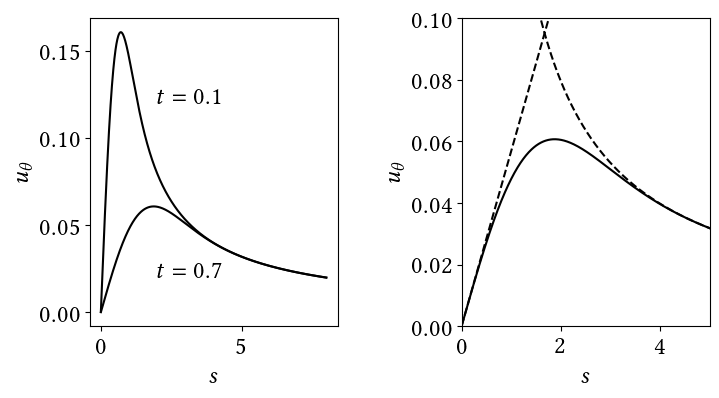

In [9]:
Gamma0 = 1.0
nu = 1.0

t0 = 0.0
t1 = 0.1
t2 = 0.7

r = np.linspace(0.001, 8, 1000)
u0 = Gamma0 / (2.0*np.pi * r)
u1 = Gamma0 / (2.0*np.pi * r) * (1.0 - np.exp(-r**2 / (4.0 * nu * t1)))
u2 = Gamma0 / (2.0*np.pi * r) * (1.0 - np.exp(-r**2 / (4.0 * nu * t2)))
u_small1 = Gamma0 / (8*np.pi * nu * t1) * r
u_small2 = Gamma0 / (8*np.pi * nu * t2) * r

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1,2,1)

ax.plot(r, u1, color="black")
ax.plot(r, u2, color="black")
ax.set_xlabel("$s$")
ax.set_ylabel(r"$u_{\theta}$")

ax.text(2, 0.12, "$t=0.1$")
ax.text(2, 0.02, "$t=0.7$")

ax = fig.add_subplot(1,2,2)
ax.plot(r, u2, color="black")
ax.plot(r, u0, color="black", ls="--")
ax.plot(r, u_small2, color="black", ls="--")
ax.set_ylim(0, 0.1)
ax.set_xlim(0, 5)
ax.set_xlabel("$s$")
ax.set_ylabel(r"$u_{\theta}$")

fig.subplots_adjust(wspace=0.5)

plt.savefig("fig_line_vortex.pdf", bbox_inches='tight')

## Figure 2.14: Vorticity transport

The vorticity for the impulsively moved boundary and the line vortex at different times, showing their evolution from infinity.

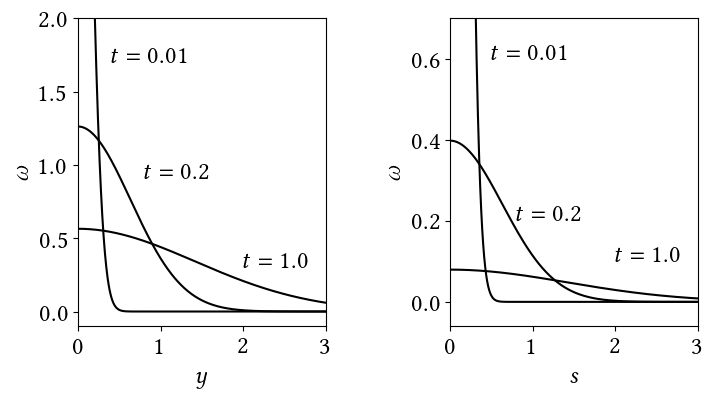

In [10]:
Gamma0 = 1.0
nu = 1.0
U = 1.0

def vorticity_imp(y, t):
    return U / np.sqrt(np.pi * nu * t) * np.exp(-y**2 / 4.0 / nu / t)

def vorticity_vortex(r, t):
    return Gamma0 / (4.0 * np.pi * nu * t) * np.exp(-r**2 / 4.0 / nu / t)

y = np.linspace(0.001, 4, 1000)

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1,2,1)

ax.plot(y, vorticity_imp(y, 0.01), color="black")
ax.plot(y, vorticity_imp(y, 0.2), color="black")
ax.plot(y, vorticity_imp(y, 1.0), color="black")
ax.set_xlabel("$y$")
ax.set_ylabel("$\omega$")
ax.set_ylim(-0.1, 2)
ax.set_xlim(0, 3)

ax.text(0.4, 1.7, "$t=0.01$")
ax.text(0.8, 0.9, "$t=0.2$")
ax.text(2.0, 0.3, "$t=1.0$")

ax = fig.add_subplot(1,2,2)

ax.plot(y, vorticity_vortex(y, 0.01), color="black")
ax.plot(y, vorticity_vortex(y, 0.2), color="black")
ax.plot(y, vorticity_vortex(y, 1.0), color="black")
ax.set_xlabel("$s$")
ax.set_ylabel("$\omega$")
ax.set_ylim(-0.06, 0.7)
ax.set_xlim(0, 3)

ax.text(0.5, 0.6, "$t=0.01$")
ax.text(0.8, 0.2, "$t=0.2$")
ax.text(2.0, 0.1, "$t=1.0$")


fig.subplots_adjust(wspace=0.5)

plt.savefig("fig_vorticity_transport.pdf", bbox_inches='tight')

## Figures 2.16: Boundary layers

Here I'm solving the ODE
$$
f''' + ff'' - f'^2 + 1 = 0
$$
with boundary conditions
$$
f(0) = 0; \quad f'(0) = 0; \quad \text{and} \quad f'(\infty) = 1.
$$

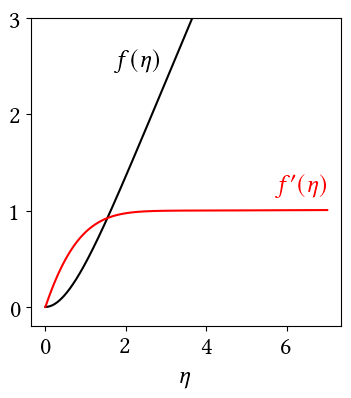

In [11]:
d_eta = 0.001
eta = np.arange(0.0, 7.0, d_eta)

# Here f = f, g = f', and h = f''.
# h0 is the initial condition for f'' -- we have to guess the value that makes the
# value of f' at infinity come out correct (it should be one).  I just did it by brute force.
def run_solution(h0):  

    f = np.zeros(len(eta))
    g = np.zeros(len(eta))
    h = np.zeros(len(eta))
    h[0] = h0

    for i in range(len(eta)-1):
        f[i+1] = f[i] + g[i] * d_eta
        g[i+1] = g[i] + h[i] * d_eta
        h[i+1] = h[i] + (g[i]**2 - f[i] * h[i] - 1.0) * d_eta
    
    return f, g

f, g = run_solution(1.2324)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)
ax.plot(eta, f, color='black')
ax.plot(eta, g, color='red')

ax.set_xlabel('$\eta$')
ax.set_ylim(-0.2, 3)
ax.text(5.7, 1.2, "$f\'(\eta)$", color='red')
ax.text(1.7, 2.5, "$f(\eta)$")

plt.savefig('fig_boundary_result1.pdf', bbox_inches='tight')

## Figure 2.17: Boundary Layers

Using the solution above to create a nice vector/heatmap plot to see the boundary layer.

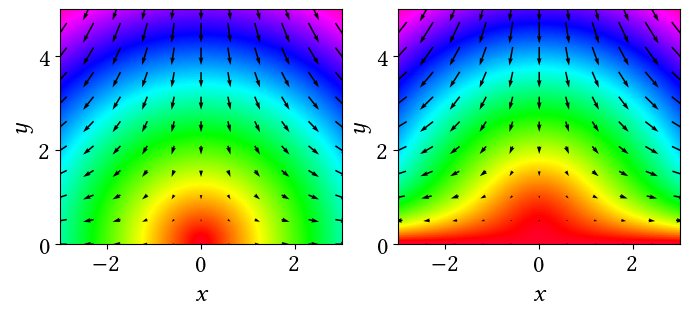

In [12]:
x = np.linspace(-3, 3, 101)
y = np.linspace(0, 5.0, 101)
x, y = np.meshgrid(x, y)

u = x * np.interp(y, eta, g)
v = -np.interp(y, eta, f)

U = np.sqrt(u**2 + v**2)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1,2,2)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_aspect('equal')
#ax.quiver(x, y, u, v, pivot='middle')
plt.imshow(U, extent=[-3, 3, 0, 5], origin='lower', cmap='gist_rainbow', alpha=1)
#plt.colorbar(shrink=0.5)

ax2 = fig.add_subplot(1,2,1)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_aspect('equal')
#ax.quiver(x, y, x, -y, pivot='middle')
plt.imshow(np.sqrt(x**2 + y**2), extent=[-3, 3, 0, 5], origin='lower', cmap='gist_rainbow', alpha=1)

x = np.linspace(-3, 3, 11)
y = np.linspace(0, 5.0, 11)
x, y = np.meshgrid(x, y)

u = x * np.interp(y, eta, g)
v = -np.interp(y, eta, f)
ax1.quiver(x, y, u, v, pivot='middle')
ax2.quiver(x, y, x, -y, pivot='middle')


plt.savefig("fig_boundary_result2.pdf", bbox_inches='tight')
